In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fastai.tabular.all import *

In [20]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
#Dropping unnecessary columns
df = df.drop(columns=['customerID'])

In [24]:
#Getting the continuous and categorical variables columns
cont_names, cat_name = cont_cat_split(df, max_card=20, dep_var='Churn')
print(f'Continuous variables: {cont_names}')
print(f'Categorical variables: {cat_name}')

Continuous variables: ['tenure', 'MonthlyCharges']
Categorical variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


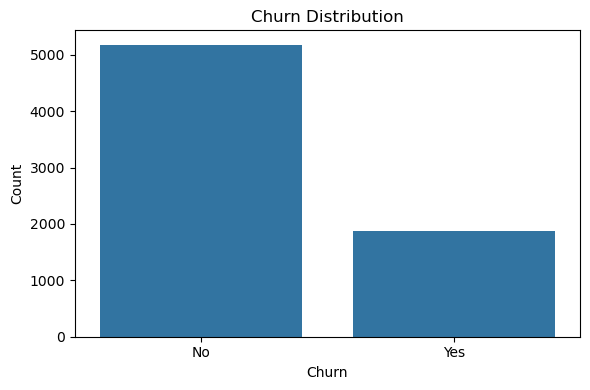

In [25]:
#I want to look at the target variable distribution first
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/churn_distribution.png')
plt.show()

In [26]:
#using describe() to look at the statistics of the numerical/continuous variable in the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


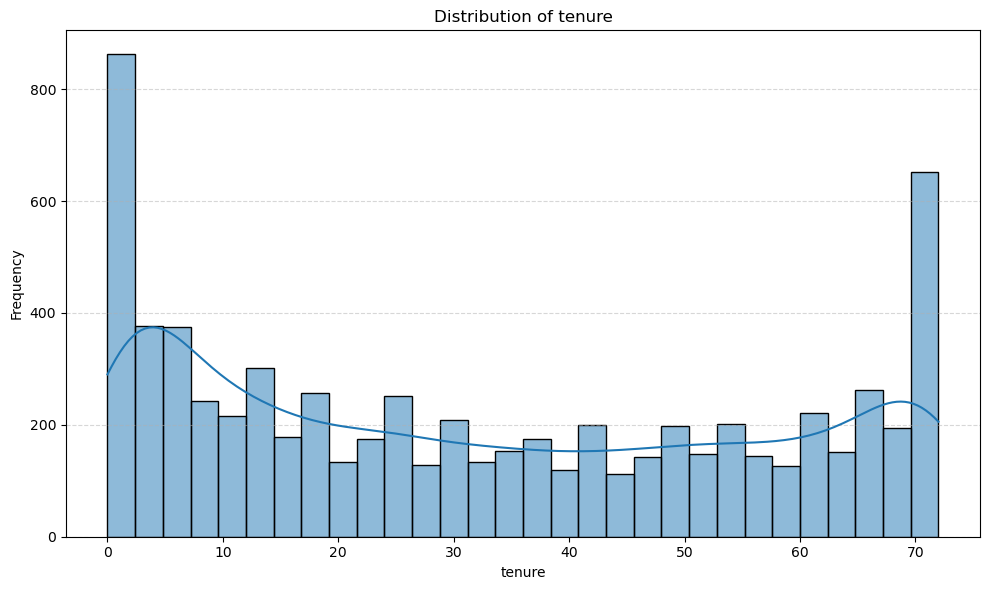

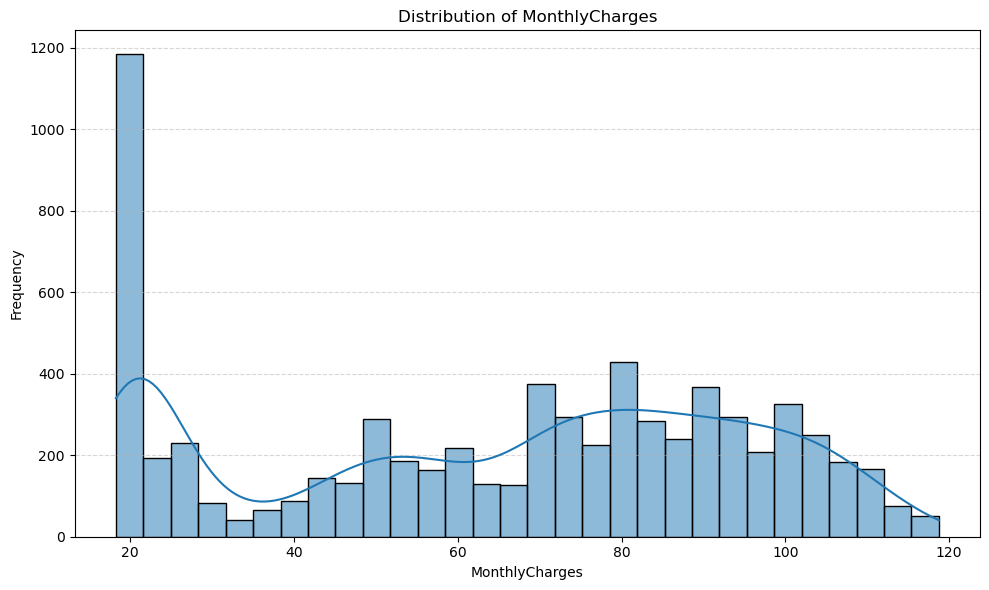

In [27]:
#Looking at the distribution of continuous variables
for col in cont_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.savefig(f'images/{col}_distribution.png')
    plt.show()

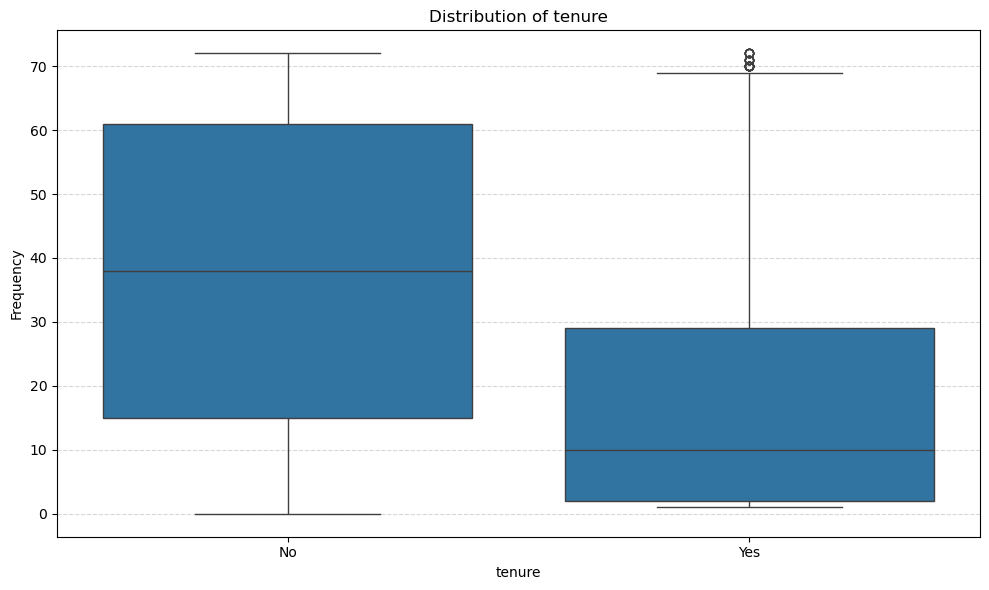

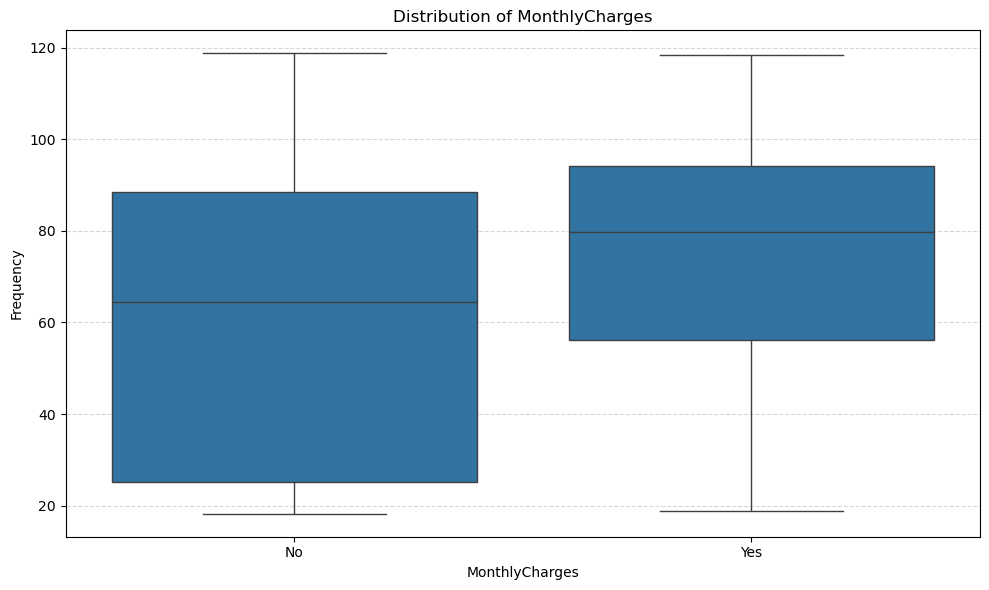

In [28]:
#Boxplot for outliers in continuous variables
for col in cont_names:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.savefig(f'images/{col}_boxplot.png')
    plt.show()

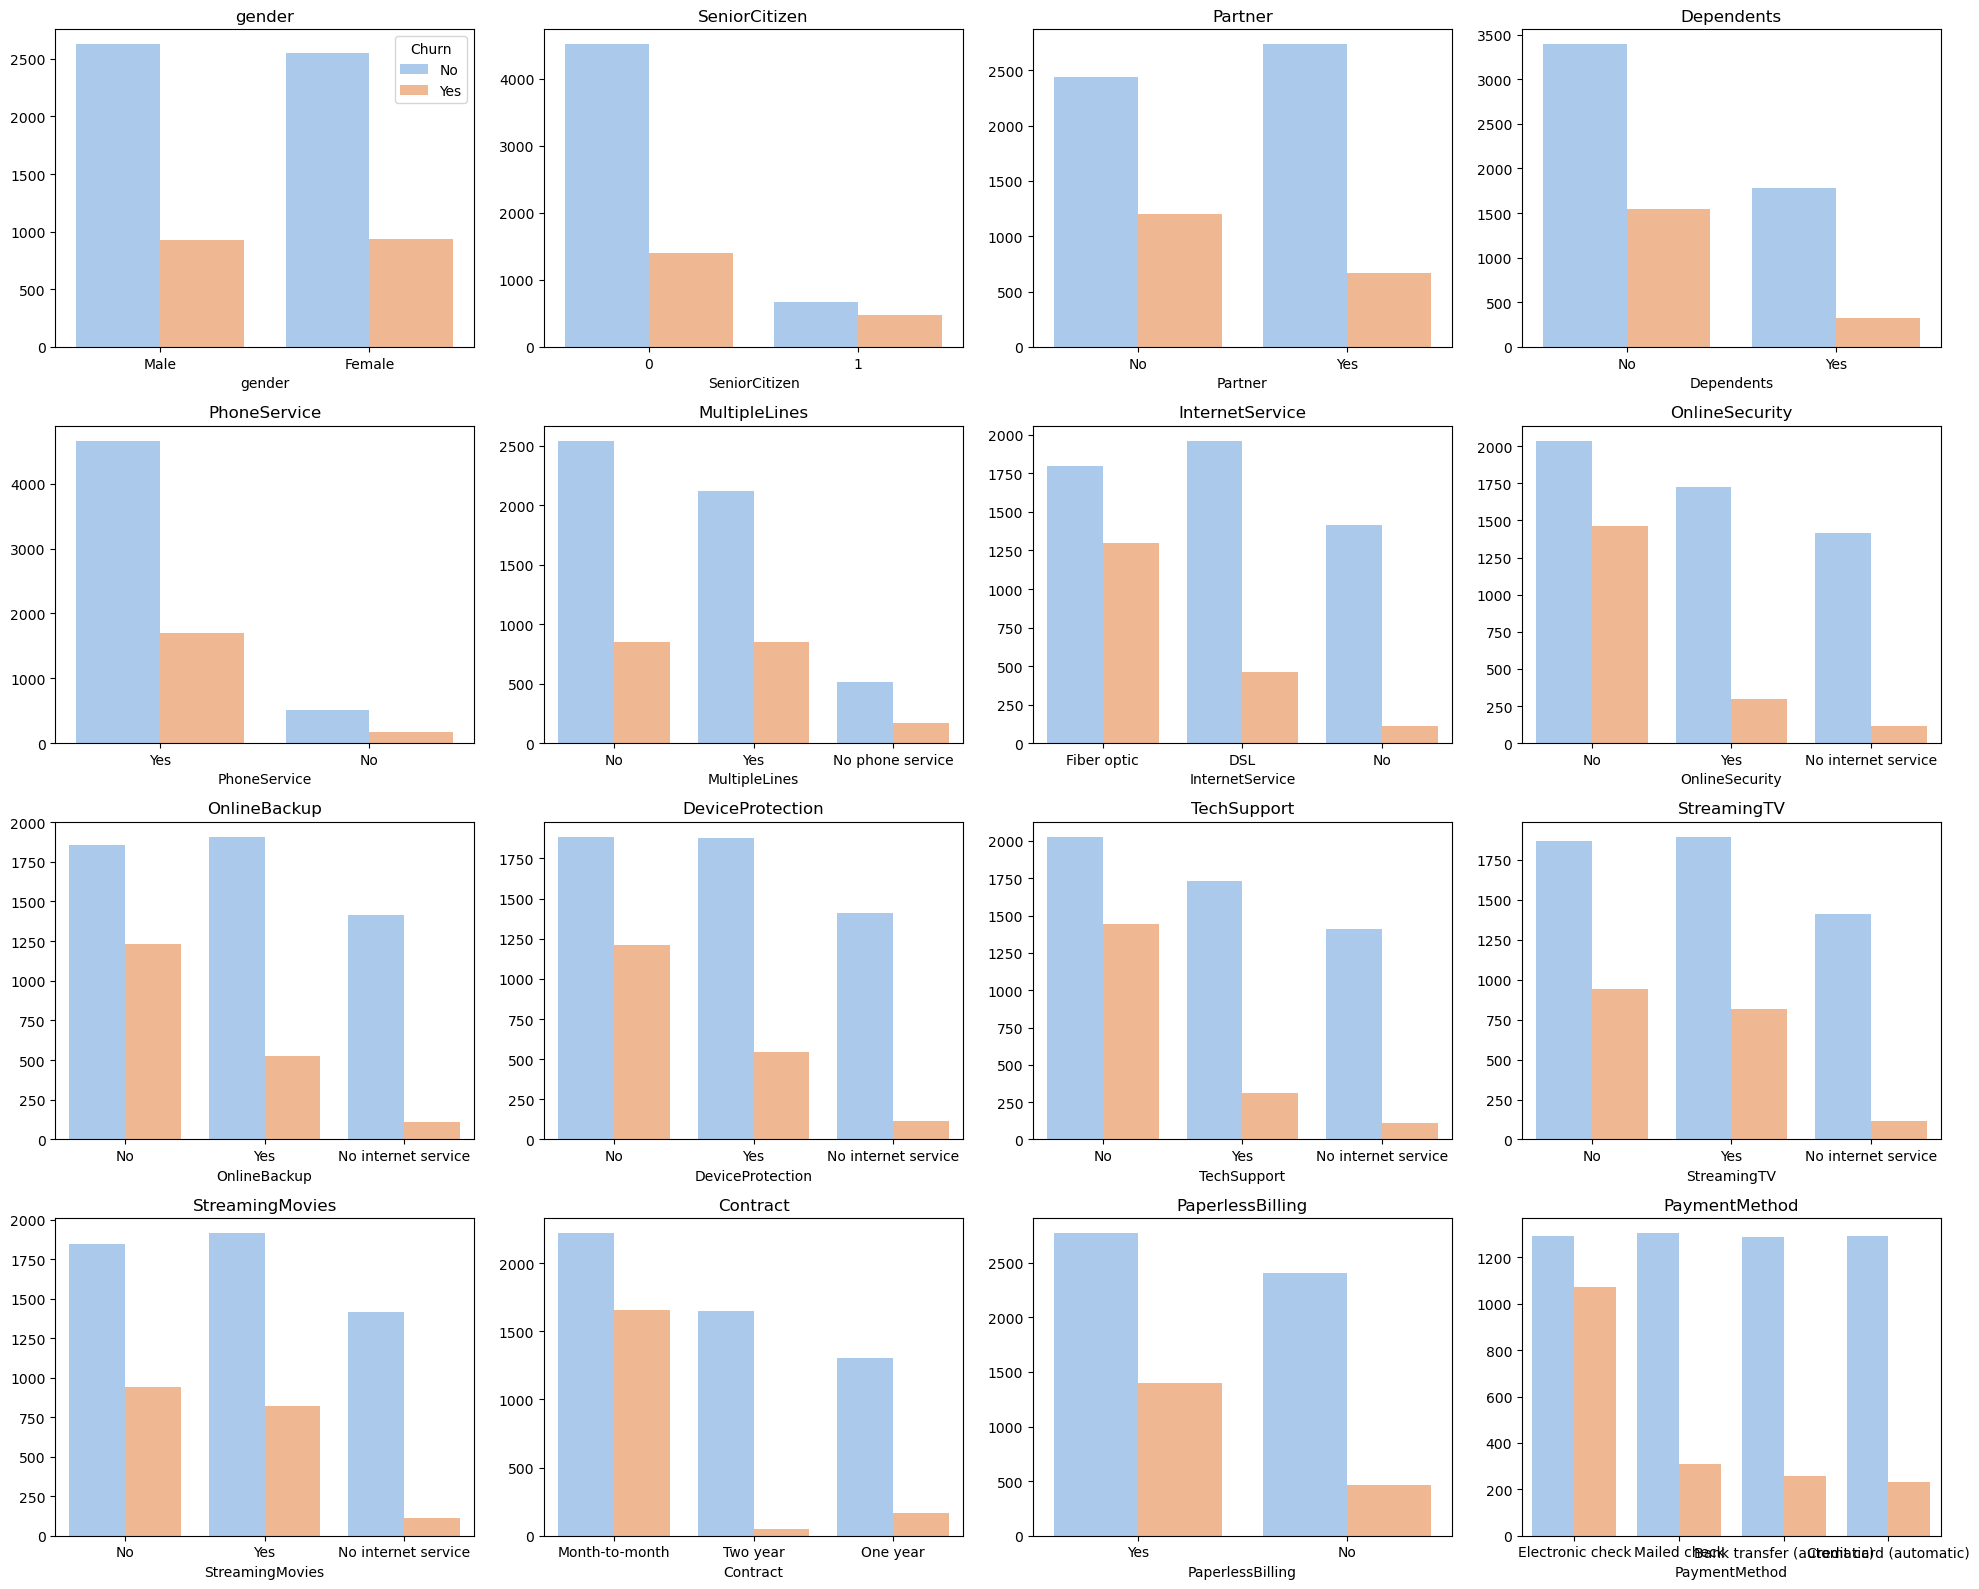

In [29]:
#Visualizing categorical features with respect to the target variable 'Churn'
n_vars = len(cat_name) - 1
n_cols = 4
n_rows = -(-n_vars // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_name[:-1]):
    if i == 0:
        sns.countplot(data=df, x=col, hue='Churn' ,palette="pastel", ax=axes[i], order=df[col].value_counts().index, legend=True)
    else:
        sns.countplot(data=df, x=col, hue='Churn',palette="pastel", ax=axes[i], order=df[col].value_counts().index,legend=False)
    axes[i].set_ylabel('')
    axes[i].set_title(f'{col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/categorical_features.png')
plt.show()

# Machine Learning

In [30]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [31]:
#Creating TabularPandas objects for training and testing sets
to_train = TabularPandas(train_df, procs=[Categorify, FillMissing, Normalize],
                        cat_names=cat_name, cont_names=cont_names,y_names='Churn')

to_test = TabularPandas(test_df, procs=[Categorify, FillMissing, Normalize],
                       cat_names=cat_name, cont_names=cont_names,y_names='Churn')

In [32]:
# Extracting X and y for training and testing sets from the TabularPandas objects
X_train, y_train = to_train.xs, to_train.ys
X_test, y_test = to_test.xs, to_test.ys

In [33]:
# Checking the balance of the target variable in training and testing sets
print(f"Train Y balance: {y_train.value_counts() * 100 / len(y_train)}")
print(f"Test Y balance: {y_test.value_counts() * 100 / len(y_test)}")

Train Y balance: Churn
0        73.464679
1        26.535321
Name: count, dtype: float64
Test Y balance: Churn
0        73.456352
1        26.543648
Name: count, dtype: float64


Accuracy: 0.7799858055358411
F1-score: 0.5441176470588235
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



<Figure size 1000x600 with 0 Axes>

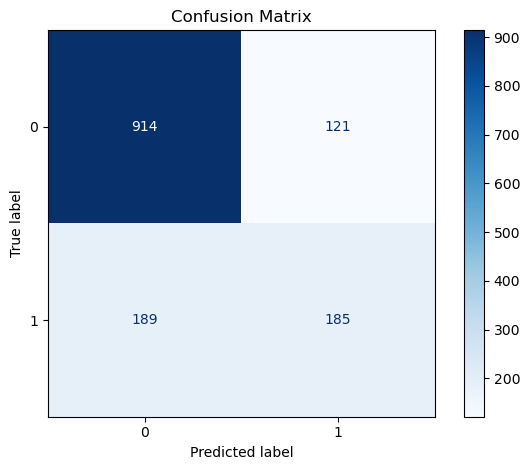

In [34]:
# I want to use XGBoost first for classification
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,f1_score

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)
xgb_model_pred = xgb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, xgb_model_pred)}")
print(f"F1-score: {f1_score(y_test, xgb_model_pred)}")
print(classification_report(y_test, xgb_model_pred))
cm = confusion_matrix(y_test, xgb_model_pred)
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('images/confusion_matrix.png')
plt.show()

d:\Anaconda\envs\Data1\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7849538679914834
F1-score: 0.5243328100470958
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.63      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



<Figure size 1000x600 with 0 Axes>

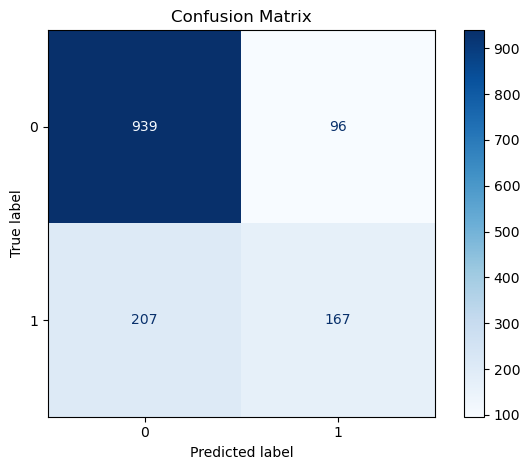

In [35]:
# Now I will use Random Forest for classification
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, rf_model_pred)}")
print(f"F1-score: {f1_score(y_test, rf_model_pred)}")
print(classification_report(y_test, rf_model_pred))
cm = confusion_matrix(y_test, rf_model_pred)
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('images/confusion_matrix_rf.png')
plt.show()

Both models performed similar. We can probably/ most likely be able to improve the performance by tuning the hyperparameters of the models.

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 2}
Best score: 0.6306742976558143
Accuracy: 0.7785663591199432

F1-score: 0.6195121951219512
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.57      0.68      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



<Figure size 1000x600 with 0 Axes>

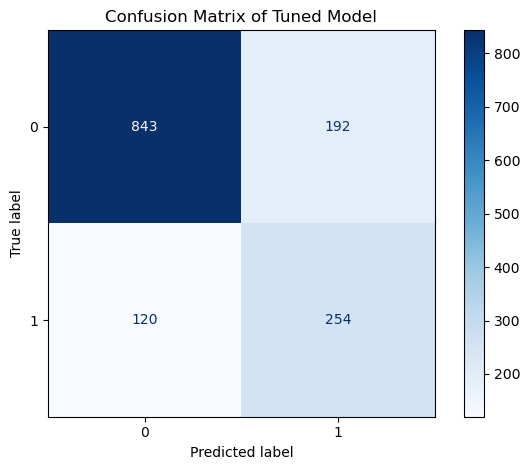

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,recall_score

xgb_model_tuned = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 2, 3],  # Adjusting for class imbalance
}
grid_search = GridSearchCV(estimator=xgb_model_tuned, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1,scoring=make_scorer(f1_score))

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
best_model_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, best_model_pred)}")
print(f"\nF1-score: {f1_score(y_test, best_model_pred)}")
print(classification_report(y_test, best_model_pred))
cm = confusion_matrix(y_test, best_model_pred)
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Tuned Model')
plt.tight_layout()
plt.savefig('images/confusion_matrix_tuned.png')
plt.show()